# Lab 4

Wilfredo Gallegos 20399


Paulo Sánchez 21401

In [44]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#Limpieza de Datos
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
nltk.download('stopwords')
nltk.download('wordnet')
# Cargar stopwords en inglés
stop_words = set(stopwords.words('spanish'))

#Analisis de Co-Ocurrencias
import networkx as nx
from itertools import combinations
from collections import Counter

#Libreria poderosa de NLP
import spacy
from collections import Counter

#Clustering de Documentos
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from textblob.sentiments import NaiveBayesAnalyzer
import string


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raule\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\raule\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [28]:
nlp = spacy.load("en_core_web_sm")
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raule\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
tweets_Bernardo=pd.read_csv("bernardoArevalo.csv")
tweets_Bernardo.head()

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1702109621899407575,1702109621899407575,https://twitter.com/eltuitdehoy_/status/170210...,2023-09-13 23:58:52+00:00,"{'id': 46561608, 'id_str': '46561608', 'url': ...",es,@AnonGTReloaded @msemillagt @BArevalodeLeon ja...,0,0,...,NaN,NaN,NaN,1.702089e+18,"{'id': 1419402501212811265, 'username': 'AnonG...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1702109505947865192,1702109505947865192,https://twitter.com/totitafuentes/status/17021...,2023-09-13 23:58:24+00:00,"{'id': 1005627722, 'id_str': '1005627722', 'ur...",es,@ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Do...,0,1,...,NaN,NaN,NaN,1.702056e+18,"{'id': 291888009, 'username': 'ASIERVERA', 'di...","<a href=""http://twitter.com/#!/download/ipad"" ...",http://twitter.com/#!/download/ipad,Twitter for iPad,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
2,2,1701995859229958189,1701995859229958189,https://twitter.com/DrDavidCabrera/status/1701...,2023-09-13 16:26:49+00:00,"{'id': 743252657083650048, 'id_str': '74325265...",es,"Paciente de 39 años, dolor lumbar de 1 año tra...",2,17,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://help.twitter.com/en/using-twi...",https://help.twitter.com/en/using-twitter/how-...,advertiser-interface,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
3,3,1702109134387134664,1702109134387134664,https://twitter.com/Fernand0483/status/1702109...,2023-09-13 23:56:55+00:00,"{'id': 1512621569834688513, 'id_str': '1512621...",es,@VicZacariasGT @soy_502 @BArevalodeLeon @msemi...,0,0,...,NaN,NaN,NaN,1.701799e+18,"{'id': 84055675, 'username': 'VicZacariasGT', ...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
4,4,1702108943495926143,1702108943495926143,https://twitter.com/MaxTiger502/status/1702108...,2023-09-13 23:56:10+00:00,"{'id': 891058586, 'id_str': '891058586', 'url'...",es,@Igor_Bitkov No le sigan el juego a este ruso ...,1,0,...,NaN,NaN,NaN,1.701898e+18,"{'id': 707086237753090048, 'username': 'Igor_B...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet


# Preprocesamiento de Texto

### Inicializar el tokenizador 

In [30]:
tokenizer = WhitespaceTokenizer()

### Inicializar el objeto Word Net Lemmatizer

In [31]:
lemmatizer = WordNetLemmatizer()

### Inicializar el objeto PorterStemmer

In [32]:
stopwords_spanish = stopwords.words('spanish')

### Inicializar el objeto PorterStemmer

In [33]:
stemmer = PorterStemmer()

### Funciones para procesar ya con los objetos inicializados

In [34]:
def eliminar_puntuacion(texto):
    # Generar una cadena que contenga todos los signos de puntuación
    puntuacion = string.punctuation
    # Eliminar los signos de puntuación de la cadena de texto
    return ''.join(caracter for caracter in texto if caracter not in puntuacion)
def convertir_a_mayusculas(texto):
    return texto.upper()

def convertir_a_minusculas(texto):
    return texto.lower()
def tokenizar(texto):
  return tokenizer.tokenize(texto)

def lemmatizar(texto):
  return [lemmatizer.lemmatize(palabra) for palabra in texto]

def Derivaciones(texto):
  return [stemmer.stem(palabra) for palabra in texto]

def is_alpha(texto):
  return [palabra for palabra in texto if palabra.isalpha()]

def remover_stopwords(texto):
  return [s for s in texto if s not in stopwords_spanish]

In [38]:
X_train=tweets_Bernardo['rawContent']

In [39]:
df_train_messages = pd.DataFrame({'message':X_train})
function_list =[
    convertir_a_minusculas,
    eliminar_puntuacion,
    tokenizar,
    Derivaciones,
    remover_stopwords,
    lemmatizar,
    is_alpha
]
df_train_messages['clean_message'] = df_train_messages['message']

for func in function_list:
    df_train_messages['clean_message'] = df_train_messages['clean_message'].apply(lambda x: func(x) if isinstance(func(x), list) else func(x))
display(df_train_messages)

,message,clean_message
0,@AnonGTReloaded @msemillagt @BArevalodeLeon ja...,"[anongtreload, msemillagt, barevalodeleon, jaj..."
1,@ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Do...,"[asiervera, aztecanoticiagt, barevalodeleon, d..."
2,"Paciente de 39 años, dolor lumbar de 1 año tra...","[pacient, año, dolor, lumbar, año, tra, caída,..."
3,@VicZacariasGT @soy_502 @BArevalodeLeon @msemi...,"[viczacariasgt, barevalodeleon, msemillagt, co..."
4,@Igor_Bitkov No le sigan el juego a este ruso ...,"[igorbitkov, sigan, juego, est, ruso, invasor,..."
...,...,...
4207,#AHORA Accidente de tránsito en el bulevar La ...,"[ahora, accident, tránsito, bulevar, madr, ave..."
4208,#AHORA Accidente de tránsito en el bulevar La ...,"[ahora, accident, tránsito, bulevar, madr, ave..."
4209,#traficogt patrulla empotrada en vía del Trans...,"[traficogt, patrulla, empotrada, vía, transmet..."
4210,@amilcarmontejo #TraficoGT anormal después del...,"[amilcarmontejo, traficogt, anorm, despué, est..."


### Obtencion de Sentimientos

In [47]:
def get_sentiment(text):
    # Unir la lista de palabras en una cadena si es una lista, de lo contrario devolver el texto como está
    if isinstance(text, list):
        text = ' '.join(text)
    text_blob = TextBlob(text)
    return text_blob.sentiment.polarity  # Retorna la polaridad del sentimiento

sentiment
 0.000000    3756
 0.200000      55
 0.433333      42
 0.600000      40
 0.166667      35
             ... 
 0.034091       1
 0.416667       1
 0.147273       1
-0.222159       1
-0.188889       1
Name: count, Length: 85, dtype: int64


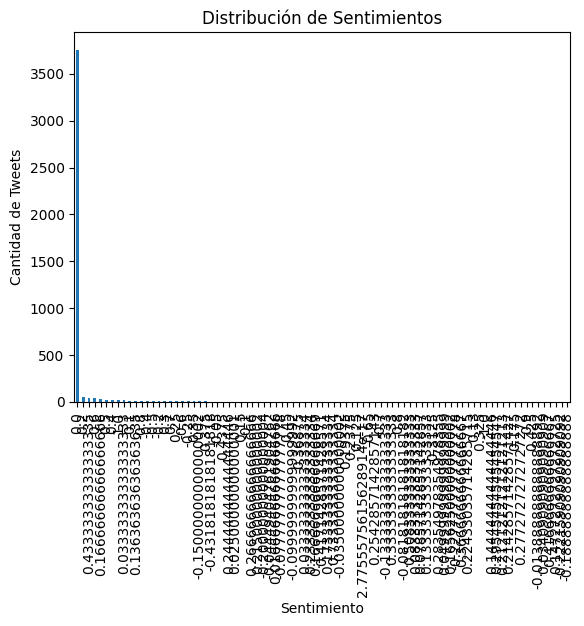

In [48]:
# Aplicar la función de sentimiento a la columna de texto limpio
df_train_messages['sentiment'] = df_train_messages['clean_message'].apply(get_sentiment)

# Mostrar la distribución de sentimientos
sentiment_distribution = df_train_messages['sentiment'].value_counts()
print(sentiment_distribution)

# Graficar la distribución de sentimientos
sentiment_distribution.plot(kind='bar', title="Distribución de Sentimientos")
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Tweets')
plt.show()